In [1]:
%pylab inline
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

Populating the interactive namespace from numpy and matplotlib


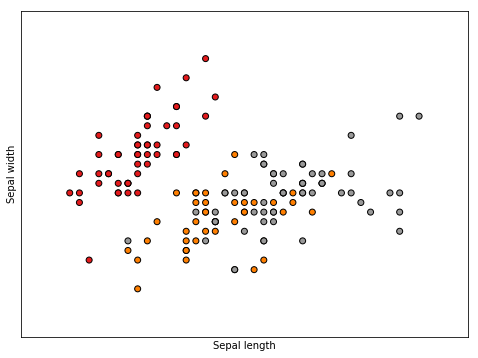

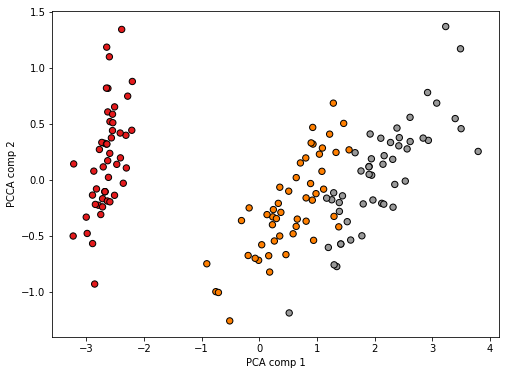

In [30]:
# From https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
#ax = Axes3D(fig, elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)
plt.xlabel('PCA comp 1')
plt.ylabel('PCCA comp 2')
#ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)
#ax.set_title("First three PCA directions")
#ax.set_xlabel("1st eigenvector")
#ax.w_xaxis.set_ticklabels([])
#ax.set_ylabel("2nd eigenvector")
#ax.w_yaxis.set_ticklabels([])
#ax.set_zlabel("3rd eigenvector")
#ax.w_zaxis.set_ticklabels([])

plt.show()

In [27]:
np.shape(X)

(150, 4)

In [19]:
np.shape(X_reduced)

(150, 2)

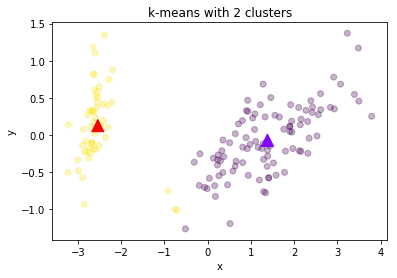

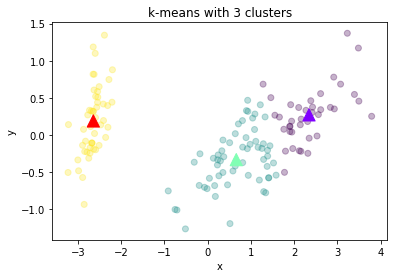

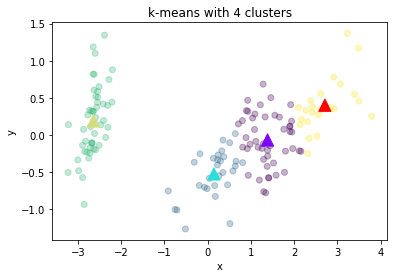

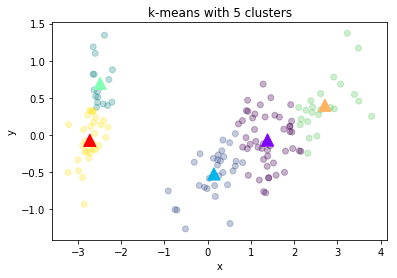

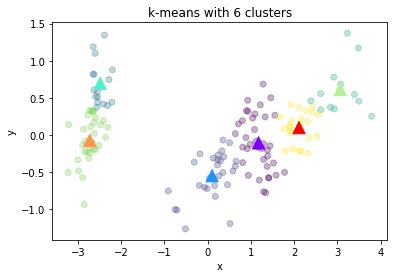

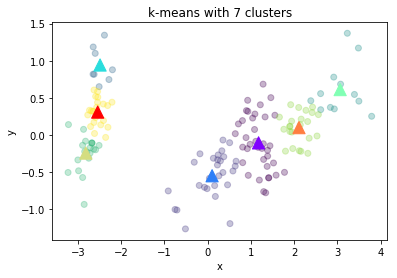

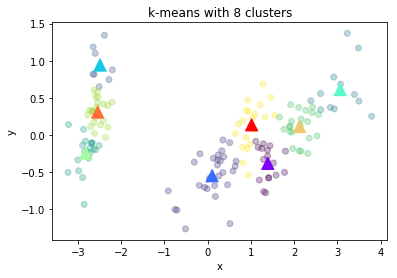

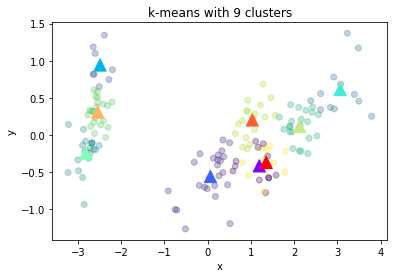

In [31]:
# Let's execute K-means in its simplest version
# We will use three clusters, a random initialization of the centroids, and a single initialization of the centroids
k_values = np.arange(2,10)

minimal_cost_function = []

for i, k_val in enumerate(k_values):
    kmeans = KMeans(n_clusters=k_val, init='random', n_init=1, random_state=0)
    kmeans.fit(X_reduced)
    labels = kmeans.predict(X_reduced)
    centroids = kmeans.cluster_centers_
    minimal_cost_function.append(kmeans.inertia_)

    # Let's plot the result!
    plt.figure(i+1)
    plt.title("k-means with %s clusters" % k_val)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, alpha=0.3, cmap="viridis")
    plt.scatter(centroids[:, 0], centroids[:, 1], c=numpy.arange(0,k_val), marker='^', s=150, cmap="rainbow")
    plt.xlabel("x")
    plt.ylabel("y")


Text(0,0.5,'minimal cost function')

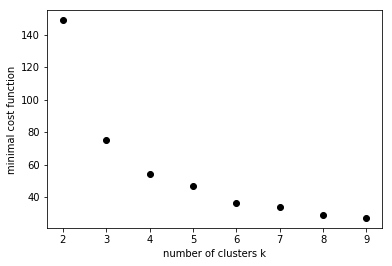

In [32]:
# let's plot the minimal cost function as a function of k

plt.scatter(k_values, minimal_cost_function, c="k")
plt.xlabel("number of clusters k")
plt.ylabel("minimal cost function")